PLotting results of fitting

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
os.chdir(os.path.expanduser("..\\..\\isttc\\scripts"))
from cfg_global import isttc_results_folder_path

### Load data

In [2]:
results_folder = isttc_results_folder_path + 'synthetic_data\\tau100ms_rec5000ms\\'
dataset_folder = isttc_results_folder_path + 'synthetic_data\\dataset\\'

In [3]:
dataset = np.load(dataset_folder + 'spike_train_tau100ms_500trials_5000ms.npy')

tau_pears_df = pd.read_pickle(results_folder + 'tau_pears_df.pkl')
tau_isttc_df = pd.read_pickle(results_folder + 'tau_isttc_df.pkl')

acf_pearson = np.load(results_folder + 'acf_pearson_l.npy')
acf_isttc = np.load(results_folder + 'acf_isttc_l.npy')

In [ ]:
# firing rates
fr = np.sum(raw_data, axis=1) / 5
fr

tau_pears_df['fr'] = fr
tau_isttc_df['fr'] = fr

In [ ]:
tau_pears_df_non_neg_1000 = tau_pears_df.query('tau_ms >= 0 and tau_ms <= 1000').copy()
tau_isttc_df_non_neg_1000 = tau_isttc_df.query('tau_ms >= 0 and tau_ms <= 1000').copy()

### Plots

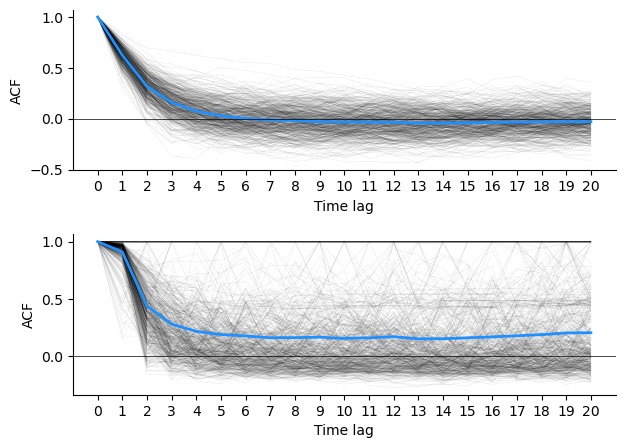

In [5]:
# sttc ACF look strange - maybe it is something with time? 

fig, axes = plt.subplots(2,1, figsize=(7,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

t_axis = np.linspace(0, 20, acf_pearson.shape[1])

avg_acf_pearson = np.mean(acf_pearson, axis=0)
avg_acf_isttc = np.mean(acf_isttc, axis=0)

for ii in range(acf_pearson.shape[0]):
    axes[0].plot(t_axis, acf_pearson[ii], c='k', lw=0.3, alpha=0.1)
axes[0].plot(t_axis, avg_acf_pearson, c='dodgerblue', lw=2, alpha=1)


for ii in range(acf_isttc.shape[0]):
    axes[1].plot(t_axis, acf_isttc[ii], c='k', lw=0.3, alpha=0.1)
axes[1].plot(t_axis, avg_acf_isttc, c='dodgerblue', lw=2, alpha=1)


for ax in axes.flat:
    ax.axhline(y=0, lw=0.5, c='k')
    ax.set_xlabel('Time lag')
    ax.set_ylabel('ACF')
    ax.set_xticks(t_axis)

sns.despine()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


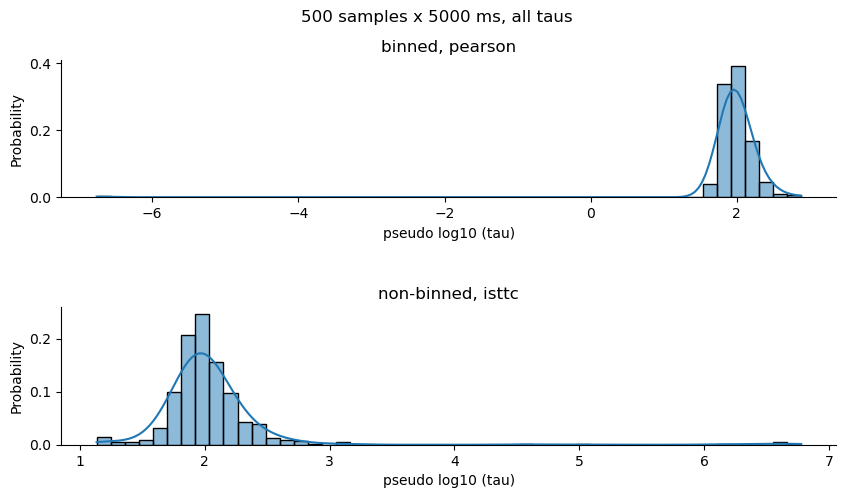

In [25]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
plt.subplots_adjust(hspace=0.8, wspace=0.4)

# pear
tau_mean = np.mean(tau_pears_df['tau_ms'].values)
tau_med = np.median(tau_pears_df['tau_ms'].values)
#sns.scatterplot(ax=axes[0], )
sns.histplot(ax=axes[0], x=tau_pears_df['tau_ms_pseudo_log'].values, bins=50, kde = True, stat='probability')
# axes[0].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
# axes[0].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

# isttc
tau_mean = np.mean(tau_isttc_df['tau_ms'].values)
tau_med = np.median(tau_isttc_df['tau_ms'].values)
sns.histplot(ax=axes[1], x=tau_isttc_df['tau_ms_pseudo_log'].values, bins=50, kde = True, stat='probability')
# axes[1].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
# axes[1].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

axes[0].set_title('binned, pearson')
axes[1].set_title('non-binned, isttc')
fig.suptitle('500 samples x 5000 ms, all taus')

for ax in axes.flat:
    ax.legend(frameon=False)
    ax.set_xlabel('pseudo log10 (tau)')

sns.despine()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


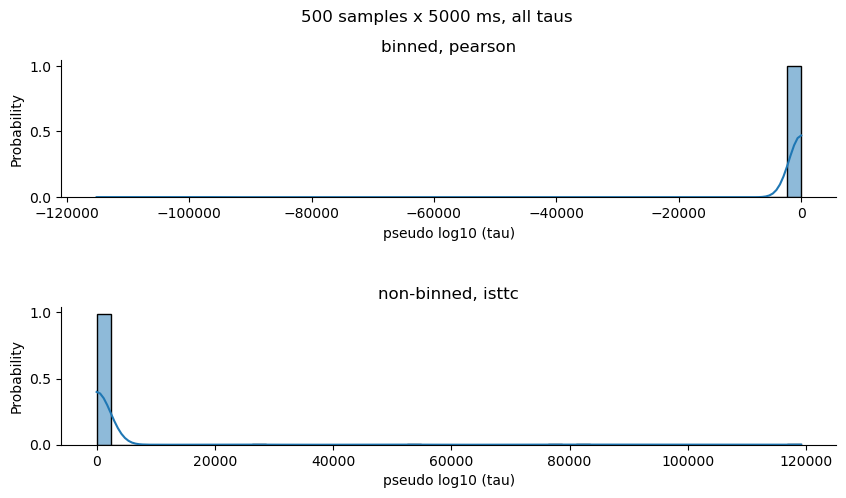

In [27]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
plt.subplots_adjust(hspace=0.8, wspace=0.4)

# pear
tau_mean = np.mean(tau_pears_df['tau_ms'].values)
tau_med = np.median(tau_pears_df['tau_ms'].values)
#sns.scatterplot(ax=axes[0], )
sns.histplot(ax=axes[0], x=tau_pears_df['tau'].values, bins=50, kde = True, stat='probability')
# axes[0].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
# axes[0].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

# isttc
tau_mean = np.mean(tau_isttc_df['tau_ms'].values)
tau_med = np.median(tau_isttc_df['tau_ms'].values)
sns.histplot(ax=axes[1], x=tau_isttc_df['tau'].values, bins=50, kde = True, stat='probability')
# axes[1].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
# axes[1].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

axes[0].set_title('binned, pearson')
axes[1].set_title('non-binned, isttc')
fig.suptitle('500 samples x 5000 ms, all taus')

for ax in axes.flat:
    ax.legend(frameon=False)
    ax.set_xlabel('pseudo log10 (tau)')

sns.despine()

In [36]:
tau_pears_df['tau_ms_pseudo_log'] = np.arcsinh(tau_pears_df['tau_ms'].values / 2) / np.log(10)
tau_pears_df['tau_pseudo_log'] = np.arcsinh(tau_pears_df['tau'].values / 2) / np.log(10)
tau_pears_df['metric'] = 'pearson'
tau_pears_df['id'] = tau_pears_df.index
tau_pears_df.sort_values(by='tau')
tau_pears_df

,tau,tau_ms,r_squared,tau_ms_pseudo_log,tau_pseudo_log,metric,id
0,2.464343,123.217165,0.779259,2.090700,0.450106,pearson,0
1,2.152549,107.627435,0.932212,2.031960,0.405758,pearson,1
2,1.573725,78.686234,0.695518,1.895969,0.313724,pearson,2
3,1.482373,74.118651,0.865796,1.870007,0.297961,pearson,3
4,1.599682,79.984109,0.898341,1.903072,0.318140,pearson,4
...,...,...,...,...,...,...,...
495,1.829328,91.466396,0.837832,1.961313,0.356003,pearson,495
496,2.992710,149.635490,0.887726,2.175054,0.518000,pearson,496
497,1.884064,94.203200,0.963659,1.974115,0.364714,pearson,497
498,1.498480,74.923975,0.766498,1.874698,0.300766,pearson,498


In [37]:
tau_isttc_df['tau_ms_pseudo_log'] = np.arcsinh(tau_isttc_df['tau_ms'].values / 2) / np.log(10)
tau_isttc_df['tau_pseudo_log'] = np.arcsinh(tau_isttc_df['tau'].values / 2) / np.log(10)
tau_isttc_df['metric'] = 'isttc'
tau_isttc_df['id'] = tau_isttc_df.index
tau_isttc_df.sort_values(by='tau', ascending=False)
tau_isttc_df

,tau,tau_ms,r_squared,tau_ms_pseudo_log,tau_pseudo_log,metric,id
0,3.094464,154.723186,0.847413,2.189574,0.530135,isttc,0
1,2.200783,110.039137,0.749364,2.041583,0.412845,isttc,1
2,1.433001,71.650067,0.750032,1.855301,0.289297,isttc,2
3,2.174473,108.723628,0.729590,2.036361,0.408990,isttc,3
4,NaN,NaN,NaN,NaN,NaN,isttc,4
...,...,...,...,...,...,...,...
495,1.694237,84.711833,0.703086,1.928005,0.333990,isttc,495
496,2.531643,126.582159,0.881953,2.102400,0.459240,isttc,496
497,2.957307,147.865340,0.765884,2.169886,0.513711,isttc,497
498,1.403327,70.166367,0.499944,1.846217,0.284041,isttc,498


In [38]:
# merge 

# long form
tau_df = pd.concat([tau_pears_df, tau_isttc_df])
tau_df.reset_index(inplace=True, drop=True)
tau_df

# short form

,tau,tau_ms,r_squared,tau_ms_pseudo_log,tau_pseudo_log,metric,id
0,2.464343,123.217165,0.779259,2.090700,0.450106,pearson,0
1,2.152549,107.627435,0.932212,2.031960,0.405758,pearson,1
2,1.573725,78.686234,0.695518,1.895969,0.313724,pearson,2
3,1.482373,74.118651,0.865796,1.870007,0.297961,pearson,3
4,1.599682,79.984109,0.898341,1.903072,0.318140,pearson,4
...,...,...,...,...,...,...,...
995,1.694237,84.711833,0.703086,1.928005,0.333990,isttc,495
996,2.531643,126.582159,0.881953,2.102400,0.459240,isttc,496
997,2.957307,147.865340,0.765884,2.169886,0.513711,isttc,497
998,1.403327,70.166367,0.499944,1.846217,0.284041,isttc,498


In [113]:
tau_df_pivot_ac_metric = tau_df.pivot(index=['id'], columns='metric', values=['tau_ms_pseudo_log','r_squared'])
#tau_df_pivot_ac_metric.columns = tau_df_pivot_ac_metric.columns.ravel()
# tau_df_pivot_ac_metric['diff'] = tau_df_pivot_ac_metric['sttc'] - tau_df_pivot_ac_metric['pearson']
tau_df_pivot_ac_metric.reset_index(level=['id'], inplace=True)
# tau_df_pivot_ac_metric['n_lags'] = tau_df_pivot_ac_metric['n_lags'].astype(str)
tau_df_pivot_ac_metric

id tau_ms_pseudo_log           r_squared          
metric                  isttc   pearson     isttc   pearson
0         0          2.189574  2.090700  0.847413  0.779259
1         1          2.041583  2.031960  0.749364  0.932212
2         2          1.855301  1.895969  0.750032  0.695518
3         3          2.036361  1.870007  0.729590  0.865796
4         4               NaN  1.903072       NaN  0.898341
..      ...               ...       ...       ...       ...
495     495          1.928005  1.961313  0.703086  0.837832
496     496          2.102400  2.175054  0.881953  0.887726
497     497          2.169886  1.974115  0.765884  0.963659
498     498          1.846217  1.874698  0.499944  0.766498
499     499          1.725502  1.809843  0.183364  0.905922

[500 rows x 5 columns]

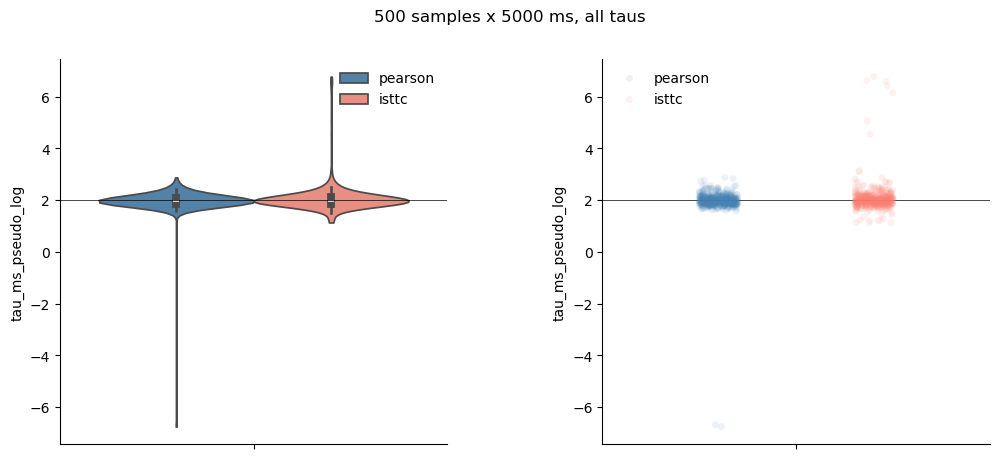

In [63]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
plt.subplots_adjust(hspace=0.8, wspace=0.4)

pseudo_log_100 = np.arcsinh(100 / 2) / np.log(10)

# violoin
sns.violinplot(ax=axes[0], y='tau_ms_pseudo_log', hue='metric', data=tau_df, cut=0,  density_norm='width', palette=['steelblue', 'salmon'])
axes[0].axhline(y=pseudo_log_100, lw=0.5, c='k')
# axes[0].axhline(y=np.arcsinh(200 / 2) / np.log(10), lw=0.5, c='k')
# axes[0].axhline(y=np.arcsinh(0 / 2) / np.log(10), lw=0.5, c='k')

# scatter
sns.stripplot(ax=axes[1], y='tau_ms_pseudo_log', hue='metric', data=tau_df, dodge=True, s=5, alpha=.1, palette=['steelblue', 'salmon'])
axes[1].axhline(y=pseudo_log_100, lw=0.5, c='k')
# axes[1].axhline(y=np.arcsinh(200 / 2) / np.log(10), lw=0.5, c='k')
# axes[1].axhline(y=np.arcsinh(0 / 2) / np.log(10), lw=0.5, c='k')

fig.suptitle('500 samples x 5000 ms, all taus')

for ax in axes.flat:
    ax.legend(frameon=False)
    #ax.set_xlabel('pseudo log10 (tau)')

sns.despine()

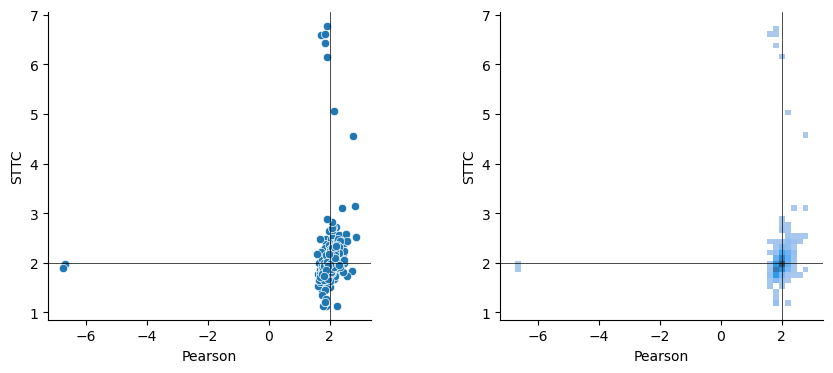

In [115]:
# plot itself
fig, axes = plt.subplots(1,2, figsize=(10,4))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x=tau_df_pivot_ac_metric['tau_ms_pseudo_log','pearson'].values, 
                y=tau_df_pivot_ac_metric['tau_ms_pseudo_log', 'isttc'].values, alpha=1)
axes[0].axhline(y=pseudo_log_100, lw=0.5, c='k')
axes[0].axvline(x=pseudo_log_100, lw=0.5, c='k')
axes[0].set_xlabel('Pearson')
axes[0].set_ylabel('STTC')
# # axes[0].legend(bbox_to_anchor=(0.5, 1.0), frameon=False)

sns.histplot(ax=axes[1], x=tau_df_pivot_ac_metric['tau_ms_pseudo_log','pearson'].values, 
             y=tau_df_pivot_ac_metric['tau_ms_pseudo_log', 'isttc'].values, bins=50)
axes[1].axhline(y=pseudo_log_100, lw=0.5, c='k')
axes[1].axvline(x=pseudo_log_100, lw=0.5, c='k')
axes[1].set_xlabel('Pearson')
axes[1].set_ylabel('STTC')

sns.despine()

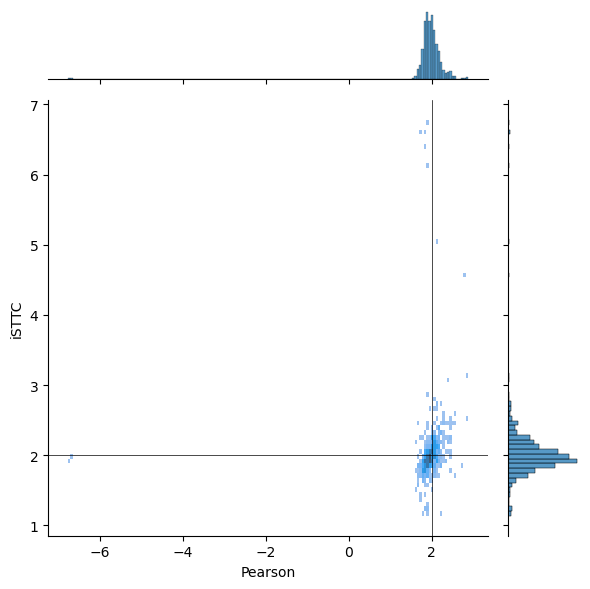

In [116]:
h = sns.jointplot(x=tau_df_pivot_ac_metric['tau_ms_pseudo_log', 'pearson'].values, 
                  y=tau_df_pivot_ac_metric['tau_ms_pseudo_log', 'isttc'].values, kind='hist')
h.ax_joint.axhline(y=pseudo_log_100, lw=0.5, c='k')
h.ax_joint.axvline(x=pseudo_log_100, lw=0.5, c='k')
h.set_axis_labels('Pearson', 'iSTTC')
h.figure.tight_layout() 

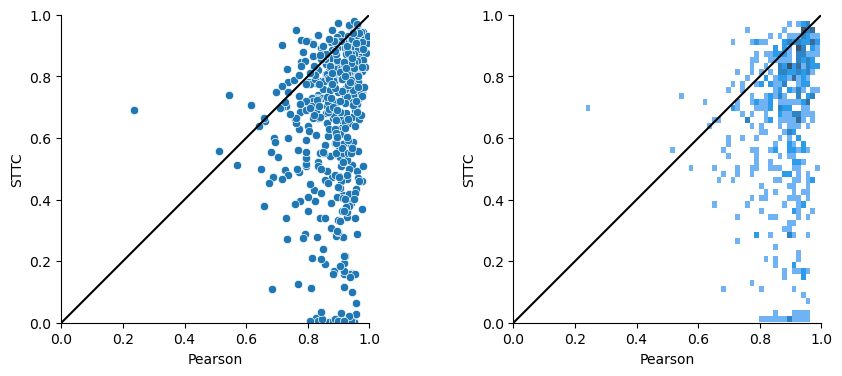

In [120]:
# plot itself
fig, axes = plt.subplots(1,2, figsize=(10,4))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x=tau_df_pivot_ac_metric['r_squared','pearson'].values, 
                y=tau_df_pivot_ac_metric['r_squared', 'isttc'].values, alpha=1)
axes[0].plot([0, 1], [0, 1], c='k', transform=axes[0].transAxes)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('Pearson')
axes[0].set_ylabel('STTC')
# # axes[0].legend(bbox_to_anchor=(0.5, 1.0), frameon=False)

sns.histplot(ax=axes[1], x=tau_df_pivot_ac_metric['r_squared','pearson'].values, 
             y=tau_df_pivot_ac_metric['r_squared', 'isttc'].values, bins=50)
axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('Pearson')
axes[1].set_ylabel('STTC')

for ax in axes.flat:
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

sns.despine()

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(5,5))

sns.regplot(x='fr', y='tau_ms', data=tau_isttc_df_non_neg_1000)
axes.set_yscale('log')
axes.set_xscale('log')

sns.despine()

In [ ]:
tau_pears_df_non_neg_1000_subset = tau_pears_df_non_neg_1000.sample(n=250)
tau_isttc_df_non_neg_1000_subset = tau_isttc_df_non_neg_1000.sample(n=250)

fig, axes = plt.subplots(2,1, figsize=(10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# pear
tau_mean = np.mean(tau_pears_df_non_neg_1000_subset['tau_ms'].values)
tau_med = np.median(tau_pears_df_non_neg_1000_subset['tau_ms'].values)
sns.histplot(ax=axes[0], x=tau_pears_df_non_neg_1000_subset['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[0].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[0].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

# isttc
tau_mean = np.mean(tau_isttc_df_non_neg_1000_subset['tau_ms'].values)
tau_med = np.median(tau_isttc_df_non_neg_1000_subset['tau_ms'].values)
sns.histplot(ax=axes[1], x=tau_isttc_df_non_neg_1000_subset['tau_ms'].values, bins=50, kde = True, stat='probability')
axes[1].axvline(x=tau_med, linewidth=1, linestyle='--', color='black', label='med ' + str(np.round(tau_med,2))) 
axes[1].axvline(x=tau_mean, linewidth=1, linestyle='--', color='red', label='mean '+ str(np.round(tau_mean,2))) 

axes[0].set_title('binned, pearson')
axes[1].set_title('non-binned, isttc')
fig.suptitle('250 random samples x 5000 ms, 0 <= tau_ms <= 1000')

for ax in axes.flat:
    ax.legend(frameon=False)
sns.despine()

In [ ]:
n_samples = 250
pears_50_mean_l = []
isttc_50_mean_l = []
pears_50_med_l = []
isttc_50_med_l = []
for i in range(n_samples):
    tau_pears_df_non_neg_1000_subset = tau_pears_df_non_neg_1000.sample(n=50)
    tau_isttc_df_non_neg_1000_subset = tau_isttc_df_non_neg_1000.sample(n=50)
    pears_50_mean_l.append(np.mean(tau_pears_df_non_neg_1000_subset['tau_ms'].values))
    pears_50_med_l.append(np.median(tau_pears_df_non_neg_1000_subset['tau_ms'].values))
    isttc_50_mean_l.append(np.mean(tau_isttc_df_non_neg_1000_subset['tau_ms'].values))
    isttc_50_med_l.append(np.median(tau_isttc_df_non_neg_1000_subset['tau_ms'].values))

In [ ]:
print(pears_50_mean_l)
print(isttc_50_mean_l)

In [ ]:
pear_df = pd.DataFrame(np.vstack((pears_50_mean_l, pears_50_med_l)).T, columns=('mean', 'median'))
isttc_df = pd.DataFrame(np.vstack((isttc_50_mean_l, isttc_50_med_l)).T, columns=('mean', 'median'))
pear_df['metric'] = 'pearson'
isttc_df['metric'] = 'isttc'
combined_df = pd.concat([pear_df, isttc_df])
combined_df

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(6,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x='metric', y='mean', data=combined_df, cut=0,  density_norm='width') 
sns.violinplot(ax=axes[1], x='metric', y='median', data=combined_df, cut=0,  density_norm='width') 

sns.despine()